In [1]:
import sys
import sqlalchemy
import config
import pandas as pd
import art
import psycopg2
import jupyterlab
import ipywidgets
import plotly.graph_objects as go
import plotly
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
from dbcontext import Context
from jupyter_service import JupyterService
art.tprint(config.name, "big")
print(sys.version, config.version, jupyterlab.__version__, plotly.__version__, ipywidgets.__version__)

 _____   _____   _____  _____   _____ 
|_   _| / ____| / ____||  __ \ |_   _|
  | |  | (___  | |     | |__) |  | |  
  | |   \___ \ | |     |  _  /   | |  
 _| |_  ____) || |____ | | \ \  _| |_ 
|_____||_____/  \_____||_|  \_\|_____|
                                      
                                      

3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)] 0.1.0.Beta 4.2.5 5.24.1 8.1.5


In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
print(config.connection_string)
context = Context()
context.create(echo=False)
service = JupyterService(context)

postgresql://postgres:sa@localhost:5432/iscri


In [13]:
actor1_code='EUR'
actor2_code='CHN'
df = service.get_norm_iscris_by_dates_codes(2023, 1, 2024, 9, actor1_code=actor1_code, actor2_code=actor2_code)
df["year_month"]=df.apply(lambda row: f"{row.year}-{row.month:02d}", axis=1) 
df["date"]=df.apply(lambda row: datetime.date(row.year, row.month, 1), axis=1)
df

SELECT iscri.*, c1.lat as lat1, c1.lon as lon1, c2.lat as lat2, c2.lon as lon2 FROM iscri
                  LEFT OUTER JOIN country c1 ON iscri.actor1_code = c1.iso3
                  LEFT OUTER JOIN country c2 ON iscri.actor2_code = c2.iso3
                  WHERE actor1_code = 'EUR' AND actor2_code = 'CHN'
                  AND year * 100 + month >= 202301
                  AND year * 100 + month <= 202409 order by iscri.year, iscri.month


,id,year,month,actor1_code,actor2_code,risk,risk3,risk4,risk_date,iscri,iscri3,iscri4,iscri_date,lat1,lon1,lat2,lon2,year_month,date
0,589133,2023,1,EUR,CHN,0.032258,0.032258,0.000000,2024-10-20 22:44:35.265044,0.376778,0.270716,0.106062,2024-10-22 23:58:26.329757,51.0,9.0,35.0,105.0,2023-01,2023-01-01
1,590616,2023,2,EUR,CHN,0.071429,0.035714,0.035714,2024-10-20 22:44:35.404457,0.410529,0.279359,0.131170,2024-10-22 23:58:30.713645,51.0,9.0,35.0,105.0,2023-02,2023-02-01
2,1008334,2023,3,EUR,CHN,0.032258,0.000000,0.032258,2024-10-21 08:52:52.845493,0.401734,0.251423,0.150311,2024-10-22 23:58:35.052147,51.0,9.0,35.0,105.0,2023-03,2023-03-01
3,592027,2023,4,EUR,CHN,0.051282,0.051282,0.000000,2024-10-20 22:44:35.535287,0.412843,0.277563,0.135280,2024-10-22 23:58:39.510064,51.0,9.0,35.0,105.0,2023-04,2023-04-01
4,593470,2023,5,EUR,CHN,0.048387,0.048387,0.000000,2024-10-20 22:44:35.706497,0.419945,0.298194,0.121752,2024-10-22 23:58:43.750061,51.0,9.0,35.0,105.0,2023-05,2023-05-01
5,1076329,2023,6,EUR,CHN,0.000000,0.000000,0.000000,2024-10-21 08:53:11.171914,0.377951,0.268374,0.109577,2024-10-22 23:58:48.013291,51.0,9.0,35.0,105.0,2023-06,2023-06-01
6,1087778,2023,7,EUR,CHN,0.000000,0.000000,0.000000,2024-10-21 08:53:12.606369,0.340156,0.241537,0.098619,2024-10-22 23:58:52.562913,51.0,9.0,35.0,105.0,2023-07,2023-07-01
7,1099120,2023,8,EUR,CHN,0.000000,0.000000,0.000000,2024-10-21 08:53:13.952903,0.306140,0.217383,0.088757,2024-10-22 23:58:56.891843,51.0,9.0,35.0,105.0,2023-08,2023-08-01
8,598760,2023,9,EUR,CHN,0.127778,0.116667,0.011111,2024-10-20 22:44:36.320814,0.403304,0.312312,0.090992,2024-10-22 23:59:01.475848,51.0,9.0,35.0,105.0,2023-09,2023-09-01
9,1119376,2023,10,EUR,CHN,0.000000,0.000000,0.000000,2024-10-21 08:53:16.478628,0.362974,0.281080,0.081893,2024-10-22 23:59:06.537861,51.0,9.0,35.0,105.0,2023-10,2023-10-01


In [14]:
df2 = service.get_norm_iscris_by_dates_codes(2023, 1, 2024, 9, actor1_code=actor2_code, actor2_code=actor1_code)
df2["year_month"]=df2.apply(lambda row: f"{row.year}-{row.month:02d}", axis=1) 
df2["date"]=df2.apply(lambda row: datetime.date(row.year, row.month, 1), axis=1)
df2

SELECT iscri.*, c1.lat as lat1, c1.lon as lon1, c2.lat as lat2, c2.lon as lon2 FROM iscri
                  LEFT OUTER JOIN country c1 ON iscri.actor1_code = c1.iso3
                  LEFT OUTER JOIN country c2 ON iscri.actor2_code = c2.iso3
                  WHERE actor1_code = 'CHN' AND actor2_code = 'EUR'
                  AND year * 100 + month >= 202301
                  AND year * 100 + month <= 202409 order by iscri.year, iscri.month


,id,year,month,actor1_code,actor2_code,risk,risk3,risk4,risk_date,iscri,iscri3,iscri4,iscri_date,lat1,lon1,lat2,lon2,year_month,date
0,589427,2023,1,CHN,EUR,0.032258,0.032258,0.000000,2024-10-20 22:44:35.272987,0.415191,0.303858,0.111333,2024-10-22 23:58:26.332755,35.0,105.0,51.0,9.0,2023-01,2023-01-01
1,590718,2023,2,CHN,EUR,0.008929,0.000000,0.008929,2024-10-20 22:44:35.407458,0.382600,0.273472,0.109128,2024-10-22 23:58:30.713645,35.0,105.0,51.0,9.0,2023-02,2023-02-01
2,1008994,2023,3,CHN,EUR,0.032258,0.032258,0.000000,2024-10-21 08:52:52.863493,0.376598,0.278383,0.098215,2024-10-22 23:58:35.059145,35.0,105.0,51.0,9.0,2023-03,2023-03-01
3,591634,2023,4,CHN,EUR,0.085417,0.052083,0.033333,2024-10-20 22:44:35.525288,0.424355,0.302628,0.121727,2024-10-22 23:58:39.506064,35.0,105.0,51.0,9.0,2023-04,2023-04-01
4,593284,2023,5,CHN,EUR,0.046774,0.014516,0.032258,2024-10-20 22:44:35.702494,0.428694,0.286882,0.141812,2024-10-22 23:58:43.747060,35.0,105.0,51.0,9.0,2023-05,2023-05-01
5,595019,2023,6,CHN,EUR,0.022222,0.011111,0.011111,2024-10-20 22:44:35.863648,0.408047,0.269305,0.138742,2024-10-22 23:58:48.007249,35.0,105.0,51.0,9.0,2023-06,2023-06-01
6,595705,2023,7,CHN,EUR,0.102151,0.043011,0.059140,2024-10-20 22:44:36.000127,0.469393,0.285385,0.184008,2024-10-22 23:58:52.537913,35.0,105.0,51.0,9.0,2023-07,2023-07-01
7,597784,2023,8,CHN,EUR,0.032258,0.000000,0.032258,2024-10-20 22:44:36.167964,0.454711,0.256846,0.197865,2024-10-22 23:58:56.866424,35.0,105.0,51.0,9.0,2023-08,2023-08-01
8,599687,2023,9,CHN,EUR,0.033333,0.033333,0.000000,2024-10-20 22:44:36.349814,0.442574,0.264495,0.178079,2024-10-22 23:59:01.485850,35.0,105.0,51.0,9.0,2023-09,2023-09-01
9,1119881,2023,10,CHN,EUR,0.000000,0.000000,0.000000,2024-10-21 08:53:16.487629,0.398316,0.238046,0.160271,2024-10-22 23:59:06.517012,35.0,105.0,51.0,9.0,2023-10,2023-10-01


-0.45000000000001705 119.25 -55 70


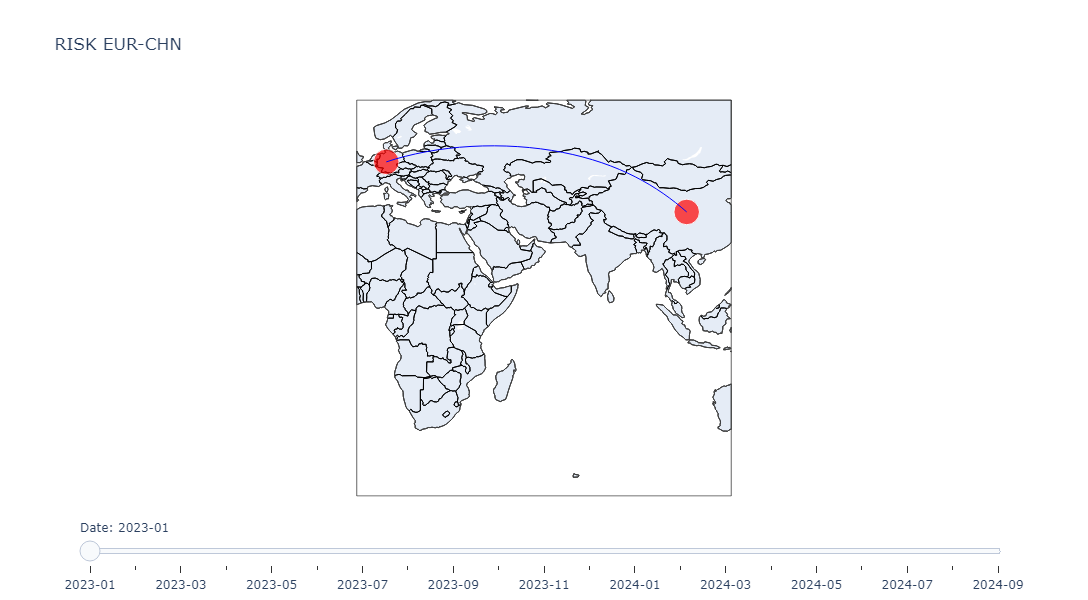

In [15]:
# import plotly.graph_objects as go

import pandas as pd

# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
# df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'

fig = go.Figure()
# print(df2.iloc[0])
l1 = []
l2 = []
nb_row = len(df)

for i, row in list(df.iterrows()):
    # print(row)
    l1.append(go.Scattergeo(
        visible=False,
        lon = [row.lon1, row.lon2],
        lat = [row.lat1, row.lat2],
        marker = dict(
            size = [row.risk * 10000 + 4, df2.iloc[i].risk * 10000 + 4],
            sizemode = 'area',
            color="#ff0000",
        ),
        showlegend=False,
    ))
    l2.append(go.Scattergeo(
        visible=False,
        lon = [row.lon1, row.lon2],
        lat = [row.lat1, row.lat2],
        mode = 'lines',
        line = dict(width = 1, color = 'blue'),
        showlegend=False,
    ))

fig = go.Figure(data=l1+l2)
fig.data[0].visible = True
fig.data[nb_row].visible = True

steps = []
i = 0
for index, row in list(df.iterrows()):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
             ],
        label=f"{row['date'].year}-{row['date'].month:02d}",
    )
    step["args"][0]["visible"][i] = True
    step["args"][0]["visible"][i+nb_row] = True
    steps.append(step)
    i+=1
    
sliders = [dict(
    currentvalue={"prefix": "Date: "},
    steps=steps
)]

lon_min = np.min(list(df.lon1) + list(df.lon2)) + 180
lon_min = np.clip(lon_min * 0.95, 0, 360) - 180
lon_max = np.max(list(df.lon1) + list(df.lon2)) + 180
lon_max = np.clip(lon_max * 1.05, 0, 360) - 180
lat_min = np.min(list(df.lat1) + list(df.lat2)) + 90
lat_max = np.max(list(df.lat1) + list(df.lat2)) + 90
lat_min = np.clip(lat_min * 0.95, -55+90, 180) - 90
lat_max = np.clip(lat_max * 1.05, -80+90, 180) - 90
if abs(lon_min - lon_max) > 180:
    lon_min = -180
    lon_max = 180
    lat_min = -55
    lat_max = 80
elif abs(lon_min - lon_max) > 90:
    # lon_min = -180
    # lon_max = 180
    lat_min = -55
    lat_max = 70
print(lon_min, lon_max, lat_min, lat_max)
                 
fig.update_geos(lataxis_range=[lat_min, lat_max], lonaxis_range=[lon_min, lon_max], showcountries=True, countrycolor="Black")
fig.update_layout(
    sliders=sliders,
    title=f"RISK {actor1_code}-{actor2_code}",
    height=600,
        width=1000,
    )

fig.show()